<a href="https://colab.research.google.com/github/dinooooooi/dinooooi/blob/main/0520%EC%9B%94%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

p.50-86

#1. 딥러닝 준비

##1-1. 주요용어
###1-1-1. 하이퍼파라미터
: 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값

기본값이 지정되어 있음/ 모델의 예측 성능을 높이기 위해 하이퍼 파라미터 값을 조절하는 행위를 하이퍼파라미터 튜닝이라고 함.
###1-1-2. 과소적합 vs 과대적합
과소적합: 모델이 충분히 학습되지 않은 경우

과대적합: 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태

과소적합과 과대적합 문제를 최소화하면서 정확도를 높일 수 있도록 하기.

훈련 데이터를 예측 데이터와 분포가 동일하게 구성하고 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소
###1-1-3. 에포크
:딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프

에포크도 하이퍼파라미터임.
###1-1-4. 손실함수
:예측 값과 정답 값의 차이 또는 오차

클래스 및 함수 형태로 정의된 손실함수를 지정해 사용   

In [ ]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

###1-1-5. 경사하강법
: 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법  

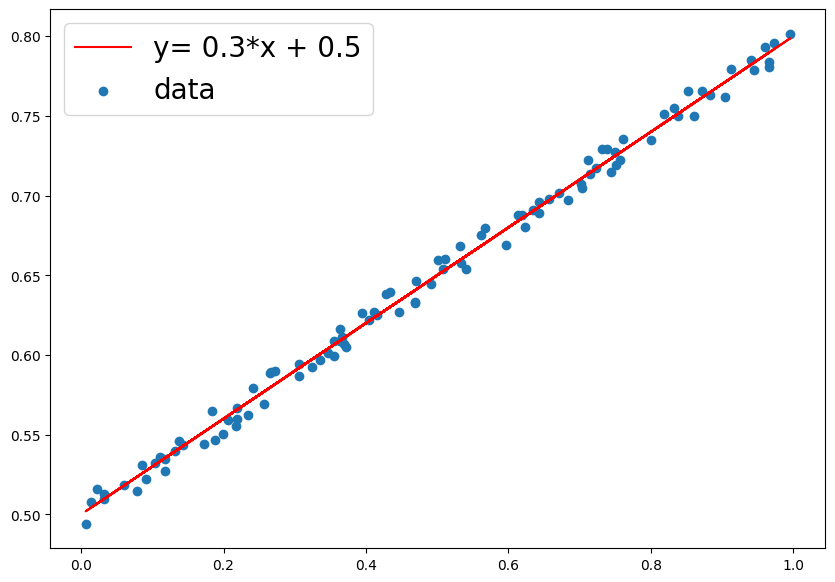

w: 0.3, b: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x, y, color='r', label=f'y= {w}*x + {b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w: {w}, b: {b}')
  return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

실제 데이터는 약간의 노이즈가 추가됨

경사하강법 알고리즘의 핵심인 w,b에 대한 그래디언트 구하는 부분만 구현

그래디언트: 손실함수를 w,b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱해 이전 w,b로부터 차감

넘파이로 그래디언트 최적화하는 과정 구현하기  

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률 learning_rate
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # hypothesis 정의
  y_hat = w * x + b

  # loss function 정의
  error = 0.5 * ((y_hat - y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print('{0:2}w = {1:.5f}, b = {2:.5f} error = {3:.5f}'.format(epoch, w, b, error))

print('----' * 15)
print('{0:2}w = {1:.1f}, b = {2:.1f} error = {3:.5f}'.format(epoch, w, b, error))

 0w = 0.61409, b = 0.36809 error = 0.69426
 5w = 0.55744, b = 0.36785 error = 0.28244
10w = 0.51928, b = 0.38725 error = 0.20533
15w = 0.48685, b = 0.40392 error = 0.14942
20w = 0.45925, b = 0.41811 error = 0.10888
25w = 0.43573, b = 0.43020 error = 0.07947
30w = 0.41571, b = 0.44050 error = 0.05815
35w = 0.39866, b = 0.44927 error = 0.04268
40w = 0.38414, b = 0.45674 error = 0.03146
45w = 0.37177, b = 0.46310 error = 0.02333
50w = 0.36124, b = 0.46851 error = 0.01743
55w = 0.35227, b = 0.47312 error = 0.01315
60w = 0.34463, b = 0.47705 error = 0.01005
65w = 0.33813, b = 0.48040 error = 0.00780
70w = 0.33259, b = 0.48324 error = 0.00617
------------------------------------------------------------
75w = 0.3, b = 0.5 error = 0.00498


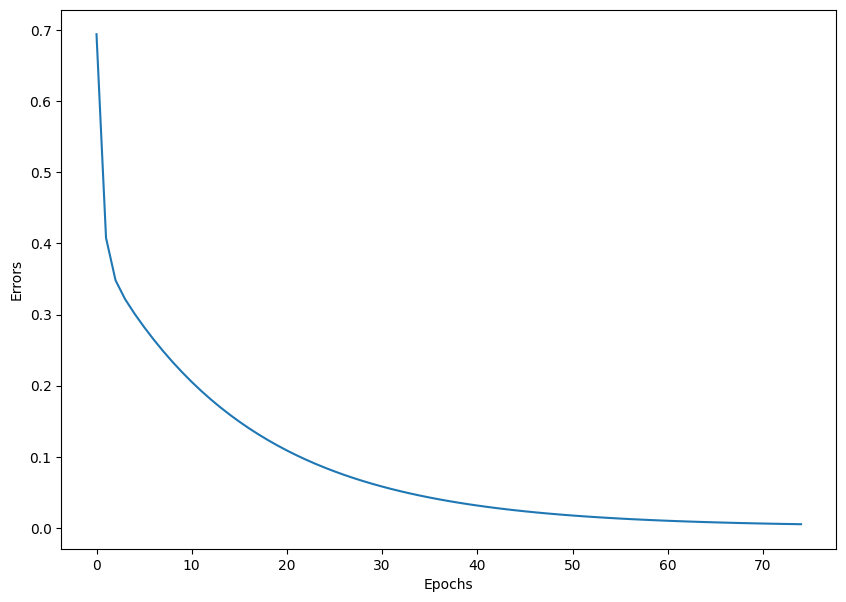

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

##1-2. 딥러닝 프로세스
###1-2-1. 데이터 전처리
데이터를 모델에 주입하기 전에 데이터를 가공하는 단계
###1-2-2. 모델 생성
모델의 구조를 정의하고 생성하는 단계
###1-2-3. 모델 컴파일
모델 인스턴스에 compile()메소드를 적용하고 앞에서 열거한 여러 가지 속성 값을 설정
###1-2-4. 모델 훈련
fit() 함수에 모델 훈련에 필요한 정보를 매개변수로 전달해 모델을 훈련하는 단계
###1-2-5. 모델 검증
모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 예측 값을 정답과 비교해 평가지표 계산
###1-2-6. 모델 예측
#2. 단순 신경망 훈련
##2-1. 선형 회귀
하나의 독립변수 X가 종속변수 Y에 미치는 영향을 추정하며 1차 함수 관계

##2-2. 뉴런
=노드

인공 신경망 모델을 구성하는 하나의 신경을 의미함.

신경망은 여러 개의 레이어를 가지며 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨.

##2-3. Dense 레이어
: 심층 신경망 모델을 구성하는 가장 기본 레이어

= 완전 연결층 / 모든 뉴런들이 서로 연결되어 있음.

노드 개수와 활성화 함수를 지정할 수 있음.

In [ ]:
import tensorflow as tf

# 10개의 노드로 이루어진 dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

##2-4. 데이터셋 만들기

단순선형회귀 모형을 지도학습 방식으로 훈련



In [ ]:
# 샘플 데이터셋 생성
X = np.arange(1, 6)

# y=3x+2
y = 3*x+2
print(x)
print(y)

[0.46923742 0.18371992 0.17284999 0.02177868 0.50128426 0.35560899
 0.11751441 0.19989466 0.4154355  0.42848267 0.68327774 0.59604845
 0.32424547 0.74411072 0.76038893 0.97278033 0.14243984 0.73111988
 0.81820471 0.36694123 0.83192555 0.01457553 0.70372212 0.71440984
 0.9441713  0.36323539 0.53197358 0.86062851 0.35573487 0.94108241
 0.10347045 0.07908169 0.2171352  0.13156165 0.13691447 0.4119027
 0.21937737 0.39472814 0.11814677 0.67041224 0.03284972 0.11065538
 0.96610027 0.03157842 0.64282912 0.56132243 0.20565277 0.71175828
 0.75112937 0.50785617 0.23467436 0.43414915 0.36379014 0.63490407
 0.06020087 0.83857381 0.75019445 0.24104038 0.75649062 0.61894651
 0.567475   0.33584473 0.91193369 0.85252504 0.95999464 0.49153309
 0.26626209 0.08606059 0.80046977 0.2723847  0.70225885 0.37241802
 0.72329825 0.46822656 0.65701904 0.18855586 0.30550765 0.73891019
 0.09112329 0.36881943 0.61342782 0.87238259 0.26480589 0.47070121
 0.9957188  0.44585926 0.40407155 0.53306496 0.54015636 0.96601

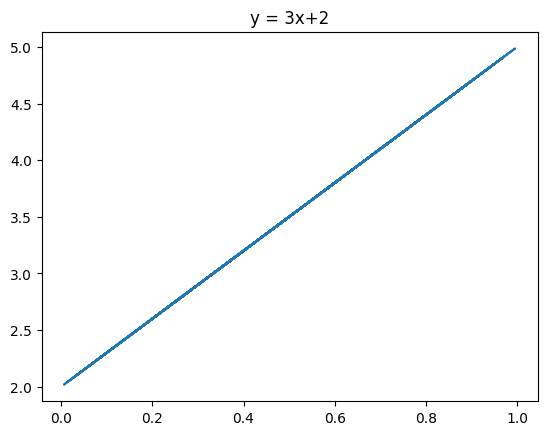

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x+2')
plt.show()

##2-5. Sequential API
케라스의 sequential API를 사용하면 간결하게 딥러니이 모델 만들 수 있음

입력 레이어부터 출력 레이어까지 순서를 가짐.

직관적인 구조 이해

2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조 만들 수 없음

###2-5-1. 모델 구조

리스트형 정의로 여러 개의 층을 입력



In [ ]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

add 함수로 레이어 추가 sequential 클래스 객체를 먼저 만들고 생성된 모델 인스턴스에 층을 추가



In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

###2-5-2. 입력 데이터 형태
sequential API를 사용할 때 첫 번째 층 input_shape 매개변수 지정



In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

###2-5-3. 단순선형회귀 모델 정의

1개의 뉴런을 가지는 Dense 레이어 한 개 사용


In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

##2-6. 모델 요약



In [ ]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##2-7. 컴파일

옵티마이저, 손실함수, 평가지표를 3가지 방법으로 지정

클래스 인스턴스, 함수, 사전 정의된 문자열로.

클래스 인스턴스 지정하면 문자열로 지정하는 경우 기본 값으로 설정된 하이퍼 파라미터 사용



In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics = ['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics = [tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanSquaredError()])

In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

##2-8. 훈련

fit 메소드에 검증 데이터셋 옵션을 지정해 검증 셋에 대한 손실과 평가지표도 함께 출력

epoch=5 : 5회 반복 훈련



In [ ]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
4/4 [==============================] - 0s 5ms/step - loss: 18.9953 - mae: 4.1579
Epoch 2/5
4/4 [==============================] - 0s 3ms/step - loss: 15.4223 - mae: 3.7199
Epoch 3/5
4/4 [==============================] - 0s 4ms/step - loss: 12.7444 - mae: 3.3581
Epoch 4/5
4/4 [==============================] - 0s 5ms/step - loss: 10.5122 - mae: 3.0244
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 8.7091 - mae: 2.7261


모델의 예측 오차가 점점 줄어드는 것을 볼 수 있음

과소적합 상태

epoch=1200으로 지정



In [ ]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
4/4 [==============================] - 0s 6ms/step - loss: 18.7904 - mae: 4.1293
Epoch 2/1200
4/4 [==============================] - 0s 6ms/step - loss: 15.6408 - mae: 3.7531
Epoch 3/1200
4/4 [==============================] - 0s 5ms/step - loss: 12.8903 - mae: 3.3756
Epoch 4/1200
4/4 [==============================] - 0s 5ms/step - loss: 10.4340 - mae: 3.0173
Epoch 5/1200
4/4 [==============================] - 0s 5ms/step - loss: 8.7214 - mae: 2.7361
Epoch 6/1200
4/4 [==============================] - 0s 5ms/step - loss: 7.2406 - mae: 2.4636
Epoch 7/1200
4/4 [==============================] - 0s 5ms/step - loss: 5.9439 - mae: 2.1942
Epoch 8/1200
4/4 [==============================] - 0s 5ms/step - loss: 5.0332 - mae: 1.9916
Epoch 9/1200
4/4 [==============================] - 0s 5ms/step - loss: 4.2532 - mae: 1.8051
Epoch 10/1200
4/4 [==============================] - 0s 4ms/step - loss: 3.5755 - mae: 1.6222
Epoch 11/1200
4/4 [==============================] - 0s 5ms/step 

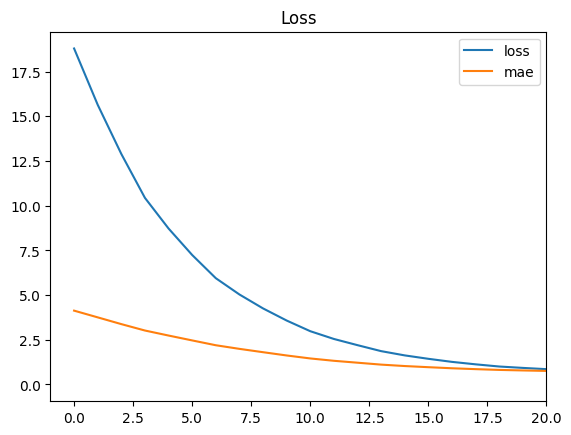

In [ ]:
import matplotlib.pyplot as plt

# 20 epoch 까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

10epoch부터 손실이 큽격히 감소

##2-9. 검증

검증 셋을 만들어두지 않았으므로 훈련 데이터셋의 x,y를 대입하여 반환하는 결과 확인



In [ ]:
# 검증
model.evaluate(x, y)

4/4 [==============================] - 0s 4ms/step - loss: 3.4266e-06 - mae: 0.0016


[3.426646799198352e-06, 0.0016003608470782638]

##2-10. 예측


In [ ]:
model.predict([10])

1/1 [==============================] - 1s 719ms/step


array([[31.937864]], dtype=float32)

#3. 심층 신경망으로 이미지 분류
##3-1. 케라스 내장 데이터셋 로드


In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [ ]:
# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set: ', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


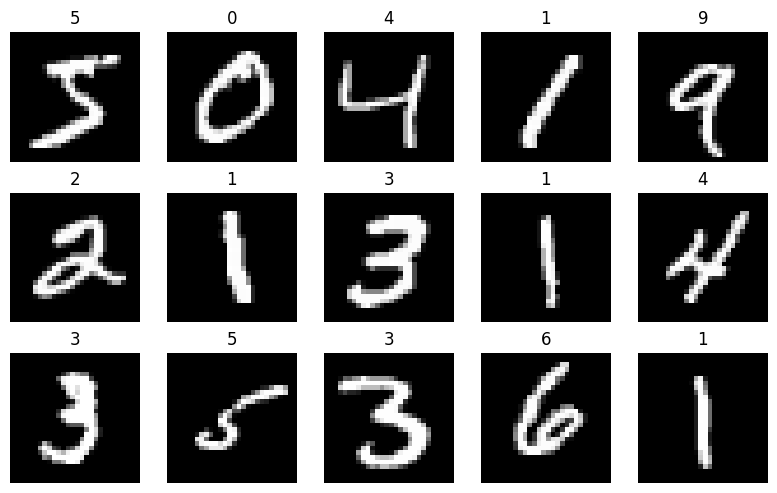

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

#canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i // 5, i % 5]  # Correctly index the subplot
    # imshow()로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')  # Display the image in grayscale
    ax.axis('off')  # Turn off the axis
    ax.set_title(str(y_train[i]))  # Set the title to the corresponding label

plt.tight_layout()
plt.show()

##3-2. 데이터 전처리

In [ ]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [ ]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전 최솟값: {x_train.min()}, 최댓값: {x_train.max()}')

# 데이터 정규화
x_train = x_train/ x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후 최솟값: {x_train.min()}, 최댓값: {x_train.max()}')

정규화 전 최솟값: 0, 최댓값: 255
정규화 후 최솟값: 0.0, 최댓값: 1.0


In [ ]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [ ]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

##3-3. Flatten 레이어

In [ ]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [ ]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


##3-4. 활성화 함수

: 입력을 비선형 출력으로 변환해주는 함수

선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현.

ex. 시그모이드, 하이퍼볼리 탄젠트, ReLU, Leaky ReLU 등


In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [ ]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우 - batch normalization를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용됨. 즉, 레이어 구성을 더 커스터마이징 하고 싶을 때 구분 처리.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

##3-5. 입력과 출력

분류 모델의 가장 마지막 레이어는 출력층.

출력층의 노드 개수는 반드시 분류해야할 클래스의 개수와 동잉ㄹ해야함.



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 출력층 노드 =1 인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력 층 노드 =2 개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

##3-6. 손실 함수


In [ ]:
# 이진 분류(출력 노드 개수 =1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [ ]:
# y가 원핫 벡터인 경우
# [0,0,0,0,0,1,0,0,0]
model.compile(loss='categorical_crossentropy')

# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss='sparse_categorical_crossentrypy')

##3-7. 옵티마이저


In [ ]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

##3-8. 평가지표

In [ ]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentryopy',
              metrics=['accuracy'])

##3-9. 훈련

In [ ]:
#훈련
model.fit(x_train,y_train,
          #검증셋지정
          validation_data=(x_test,y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2286 - sparse_categorical_accuracy: 0.9319 - val_loss: 0.1200 - val_sparse_categorical_accuracy: 0.9618
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0974 - sparse_categorical_accuracy: 0.9694 - val_loss: 0.0858 - val_sparse_categorical_accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0683 - sparse_categorical_accuracy: 0.9793 - val_loss: 0.0766 - val_sparse_categorical_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0503 - sparse_categorical_accuracy: 0.9839 - val_loss: 0.0810 - val_sparse_categorical_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0414 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.0783 - val_sparse_categorical_accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0338 

##3-10. 평가

In [ ]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0927 - sparse_categorical_accuracy: 0.9801
검증 셋 정확도: 0.9800999760627747


##3-11. 예측

In [ ]:
#예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
#예측 결과 출력
predictions[0]

array([6.2354996e-11, 2.5147156e-07, 8.5397200e-09, 2.9649035e-08,
       1.1408156e-08, 1.3417527e-12, 6.3721140e-16, 9.9999934e-01,
       1.1740362e-11, 2.9847158e-07], dtype=float32)

In [ ]:
import numpy as np

#0번 index에 대해 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10],axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


<function matplotlib.pyplot.show(close=None, block=None)>

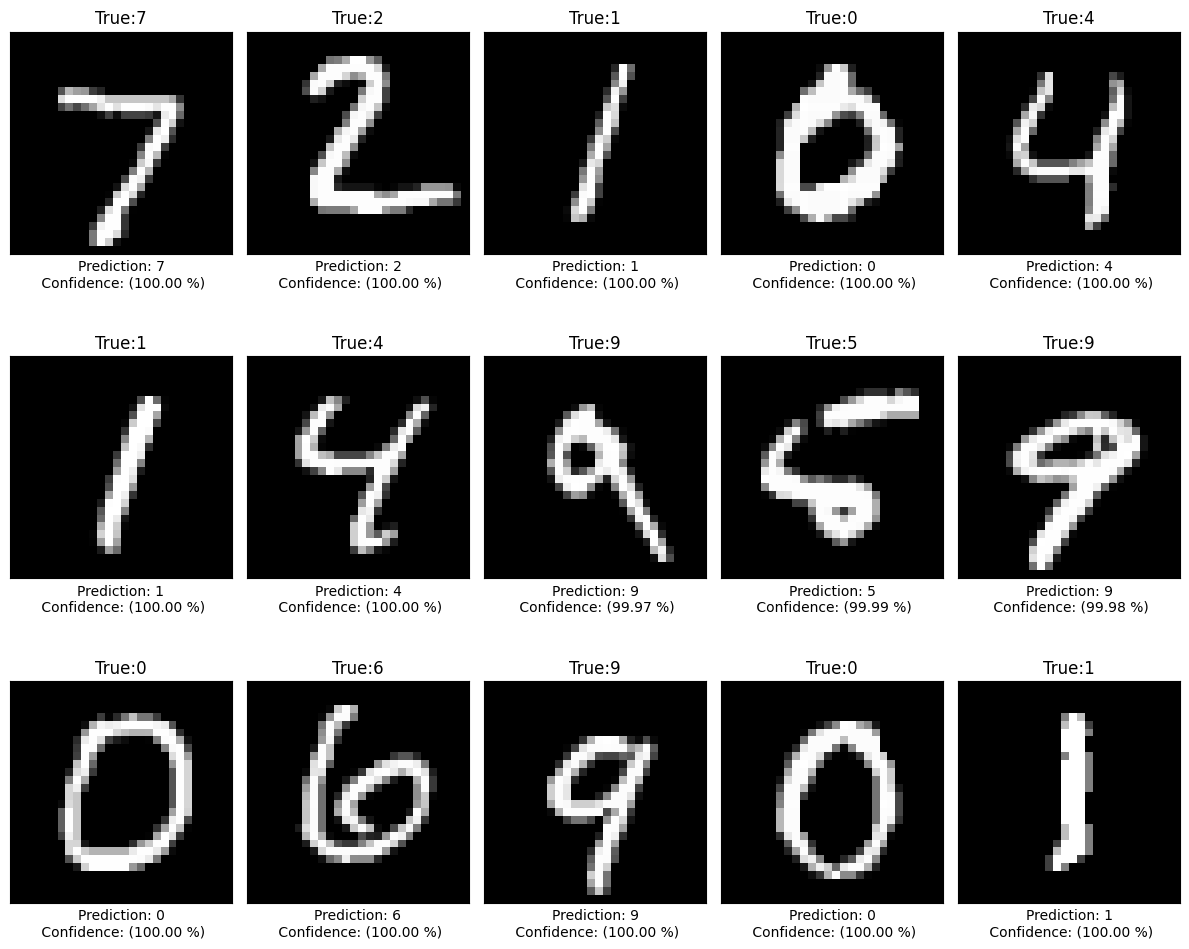

In [ ]:
#데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

#canvas 생성
fig,axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
  ax=axes[i//5][i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  #imshow로 이미지 시각화
  ax.imshow(img,cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True:{y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\n Confidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show